In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generating My Own Data Frame
This dataframe is designed (using pyhton dictionary) to estalish the relationship between the hours studied and the marks scored by a student

In [4]:
df = pd.DataFrame({'Hours_studied':range(3,24,2),
          'Test_Grade':[57,63,65,71, 74.9, 76.6,80,80.1,82.3, 82.9,83.2]},
           index = range(11))
df

,Hours_studied,Test_Grade
0,3,57.0
1,5,63.0
2,7,65.0
3,9,71.0
4,11,74.9
5,13,76.6
6,15,80.0
7,17,80.1
8,19,82.3
9,21,82.9


<AxesSubplot:title={'center':'Grade vs Hours Studied'}, xlabel='Hours_studied', ylabel='Test_Grade'>

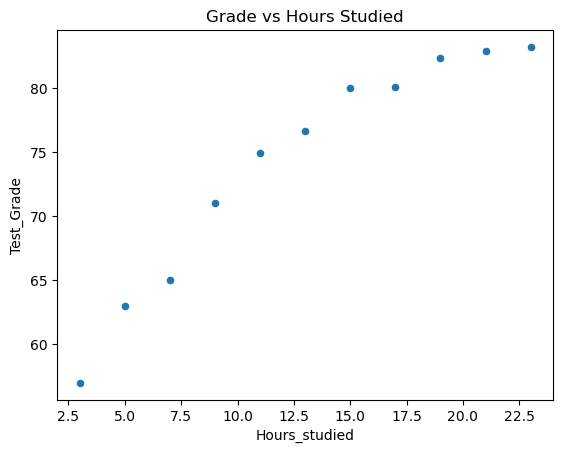

In [5]:
k = df['Test_Grade']
m = df['Hours_studied']
df.plot(kind='scatter', x='Hours_studied', y='Test_Grade', title='Grade vs Hours Studied') 


In [6]:
df.corr()

,Hours_studied,Test_Grade
Hours_studied,1.000000,0.955606
Test_Grade,0.955606,1.000000


## Regression Analysis Model

In [7]:
# importing linear regression function 
import sklearn.linear_model as lm


In [8]:
# Create linear regression object 
lr = lm.LinearRegression()
lr

LinearRegression()

# Training the Linear Regression ML Model

In [9]:
x= df.Hours_studied[:, np.newaxis] # independent variable 
y= df.Test_Grade.values            # dependent variable
# Training the model using the training sets 
lr.fit(x, y) 
print ("Intercept: ", lr.intercept_)
print ("Coefficient: ", lr.coef_)



C:\Users\JOB\AppData\Local\Temp\ipykernel_5972\3197273393.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x= df.Hours_studied[:, np.newaxis] # independent variable


Intercept:  57.29363636363637
Coefficient:  [1.29909091]


##### Using the Linear Regreassion Model To Manually Predict Test Grades for Some Given Study Hrs (6hrs)

In [10]:
# manual prediction for a given value of x 
print("Manual prdiction :", lr.intercept_ + lr.coef_*6)


Manual prdiction : [65.08818182]


##### Predicting the test grades for 6 study hrs using the built-in leinear regression function 


In [11]:
scalar = 6
array = np.array([[scalar]])
print("Using predict function: ", lr.predict(array))

Using predict function:  [65.08818182]


### Regression Modelling

Text(0.5, 0, 'Hours_Studied')

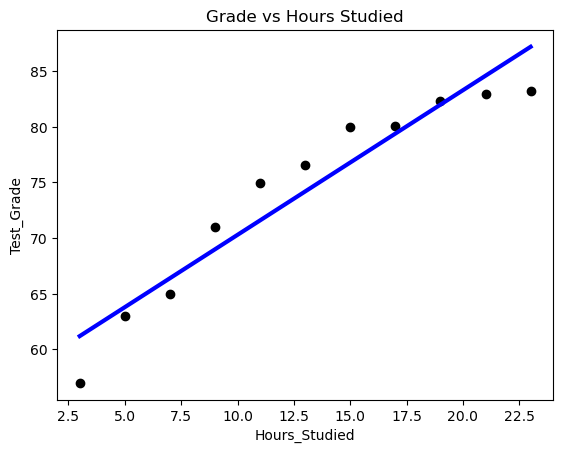

In [9]:
# plotting fitted line 
plt.scatter(x, y,  color='black') 
plt.plot(x, lr.predict(x), color='blue', linewidth=3) 
plt.title('Grade vs Hours Studied') 
plt.ylabel('Test_Grade') 
plt.xlabel('Hours_Studied')

#### The efficiency of the model: Computing R Squared, Root Mean Squared Error (RMSE), and Mean Absolute Error(MAE)

In [10]:
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error


In [11]:
# add predict value to the data frame 
df['Test_Grade_Pred'] = lr.predict(x)


#### R-Squared

##### Manually calculating R Squared 

In [12]:
df['SST'] = np.square(df['Test_Grade'] - df['Test_Grade'].mean()) 
df['SSR'] = np.square(df['Test_Grade_Pred'] - df['Test_Grade'].mean())
print ("Sum of SSR:", df['SSR'].sum()) 
print ("Sum of SST:", df['SST'].sum())
print ("R Squared using manual calculation: ", df['SSR'].sum() / df['SST'].sum())


Sum of SSR: 742.560363636364
Sum of SST: 813.1563636363635
R Squared using manual calculation:  0.9131827491525732


##### Using built-in function 

In [14]:
print ("R Squared using built-in function: ", r2_score(df.Test_Grade, y)) 
print ("Mean Absolute Error: ", mean_absolute_error(df.Test_Grade, df.Test_Grade_Pred)) 
print ("Root Mean Squared Error: ", np.sqrt(mean_squared_error(df.Test_Grade, df.Test_Grade_Pred)))


R Squared using built-in function:  1.0
Mean Absolute Error:  2.1844628099173535
Root Mean Squared Error:  2.533341307802441
